In [1]:
# Goal: Locate suspects faster through rapid car identification. 
# Biz Goal: Highly engaging POC, highly marketable, attention grabbing

# How: 
#- Video to image (later, tracking across frames)
#- Object Detection to find license plates
#- OCR to pull LP#
#- DF search & match to find relevant information.

#Notes: 

In [2]:
!which python

/Users/whit_blodgett/opt/anaconda3/envs/license-plate/bin/python


In [26]:
import requests
import cv2
import numpy as np
import time
from landingai.postprocess import crop
from landingai.predict import Predictor, OcrPredictor
from landingai import visualize


# Replace 'path_to_video_file' with the actual path to your video file
video_file_path = '/Users/whit_blodgett/Desktop/Code/landing-apps-poc/IMG_2075.mov'

# 1. iPhone Video to image
def extract_frames(video_file_path):
    vidcap = cv2.VideoCapture(video_file_path)
    success, image = vidcap.read()
    count = 0
    frames = []
    while success:
        # save every 30th frame as jpg file (you can modify this based on your requirement)
        if count % 100 == 0:
            frames.append(image)
        success, image = vidcap.read()
        count += 1
    return frames

frames = extract_frames(video_file_path)

In [ ]:
# def display_frames(frames):
#     for frame in frames:
#         cv2.imshow('Frame', frame)
#         if cv2.waitKey(25) & 0xFF == ord('q'):  # Press 'q' to exit the display loop
#             break

#     # Release the video display window and close it
#     cv2.destroyAllWindows()

# # display_frames(frames)

No predictions to overlay, returning original image
No predictions to overlay, returning original image
No predictions to overlay, returning original image
No predictions to overlay, returning original image
No predictions to overlay, returning original image
No predictions to overlay, returning original image
No predictions to overlay, returning original image
No predictions to overlay, returning original image
No predictions to overlay, returning original image
No predictions to overlay, returning original image
No predictions to overlay, returning original image
No predictions to overlay, returning original image


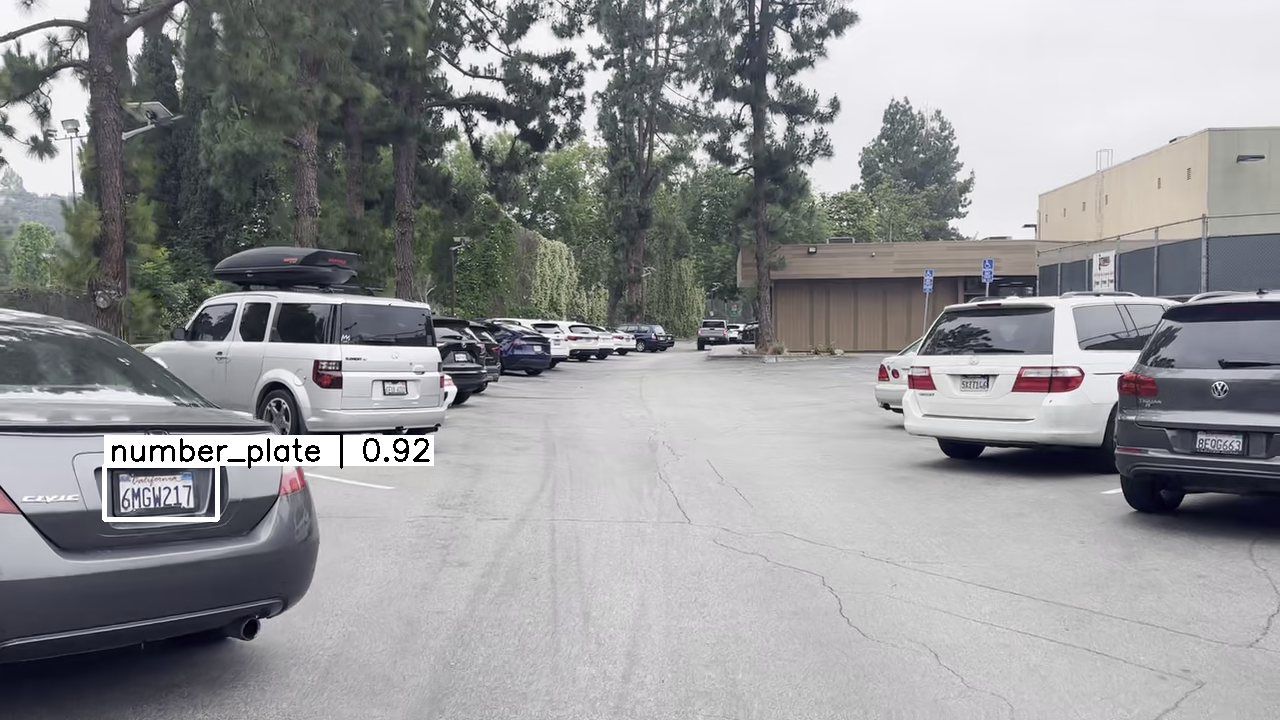

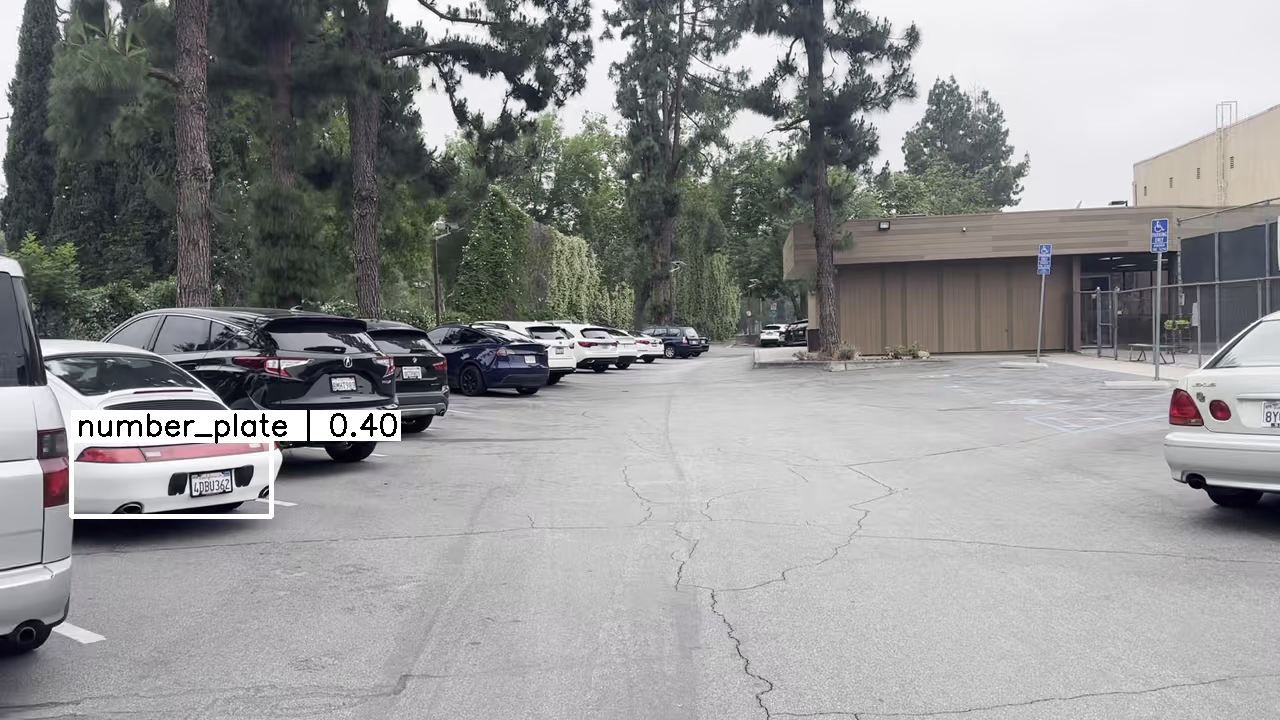

In [27]:
def detect_license_plates(frames):
    bounding_boxes = []
    overlayed_frames = []
    api_key = "land_sk_OdafnFLV340HT1eCdvm3Z4X3Xev8VP58iAhfqh6hAdnORL9ySq"
    model_endpoint = "972bcd20-31fc-4537-96f4-8b92e3a91408"
    predictor = Predictor(model_endpoint, api_key=api_key)
    
    for frame in frames:
        prediction = predictor.predict(frame)
        # store predictions in a list
        # convert to rgb
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        overlay = visualize.overlay_predictions(prediction, frame)
        bounding_boxes.append(prediction)
        overlayed_frames.append(overlay)

    return bounding_boxes, overlayed_frames

bounding_boxes, overlayed_frames = detect_license_plates(frames)

# show 5 overlayed frames
for i, frame in enumerate(overlayed_frames):
    if len(bounding_boxes[i]) == 0:
        continue
    display(frame)


14


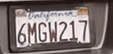

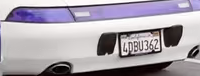

In [28]:
# cropping the license plate
cropped_imgs = []
for frame, bboxes in zip(frames, bounding_boxes):
    cropped_imgs.append(crop(bboxes, frame))

print(len(cropped_imgs))
# show 5 overlayed frames
for i, cropped in enumerate(cropped_imgs):
    if len(cropped) == 0:
        continue
    for plate in cropped:
        display(plate)

[]
[[OcrPrediction(score=0.9395424127578735, text='6MGW217', location=[(14, 20), (87, 14), (89, 42), (17, 48)])], [OcrPrediction(score=0.5516130328178406, text='C0B0362', location=[(114, 34), (163, 28), (165, 54), (116, 60)])]]


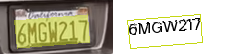

6MGW217


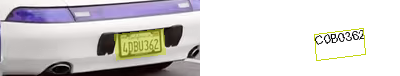

C0B0362


In [48]:

# set staging OCR API key 

import PIL.Image
ocr_predictor = OcrPredictor(api_key='land_sk_EkHnd6IDQvRVpgRcA3xCcUDAjDNqogs8Z3EKidTRctlZogIZwp')

ocr_preds = []
overlayed_ocr = []
print(cropped_imgs[0])
for frame in cropped_imgs:
    for plate in frame:
        ocr_pred = ocr_predictor.predict(plate)
        ocr_preds.append(ocr_pred)
        overlay = visualize.overlay_predictions(ocr_pred, plate)
        overlayed_ocr.append(overlay)
print(ocr_preds)
for frame, ocr_pred in zip(overlayed_ocr, ocr_preds):
    if len(ocr_pred) == 0:
        continue
    display(frame)
    for text in ocr_pred:
        print(text.text)

In [30]:
print(bounding_boxes)

[[], [], [], [], [ObjectDetectionPrediction(score=0.9219547510147095, label_name='number_plate', label_index=2, id='e6aa4f0c-b6ff-4653-ab25-d6161a4fd659', bboxes=(104, 465, 217, 519))], [], [ObjectDetectionPrediction(score=0.39925363659858704, label_name='number_plate', label_index=2, id='e1b1b409-10bc-4d4e-b34a-ccde2d43c12e', bboxes=(71, 440, 271, 516))], [], [], [], [], [], [], []]
